In [1]:
pip install pandas



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from postpartum_ml_repo import load_data, preprocess_data, train_model
import pandas as pd


df = pd.read_csv("data/final_merged_postpartum_data.csv")

print(df.head())
print("\nColumn Names:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Shape:", df.shape)

         Timestamp    Age Feeling sad or Tearful  \
0  6/14/2022 20:02  35-40                    Yes   
1  6/14/2022 20:03  40-45                    Yes   
2  6/14/2022 20:04  35-40                    Yes   
3  6/14/2022 20:05  35-40                    Yes   
4  6/14/2022 20:06  40-45                    Yes   

  Irritable towards baby & partner Trouble sleeping at night  \
0                              Yes   Two or more days a week   
1                               No                        No   
2                               No                       Yes   
3                              Yes                       Yes   
4                               No   Two or more days a week   

  Problems concentrating or making decision Overeating or loss of appetite  \
0                                       Yes                            Yes   
1                                       Yes                            Yes   
2                                       Yes                         

In [3]:

from postpartum_ml_repo import preprocess_data

df, encoders = preprocess_data(df)

print(df.head())

trained_model = train_model(df)


Missing Values After Cleaning:
 Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64


In [5]:

age_mapping = {"18-25": 1, "25-30": 2, "30-35": 3, "35-40": 4, "40-45": 5, "45-50": 6}
df["Age"] = df["Age"].map(age_mapping)

print(df["Age"].head())


0    4
1    5
2    4
3    4
4    5
Name: Age, dtype: int64


In [6]:

df.to_csv("cleaned_postpartum_data.csv", index=False)

print("Data Cleaning Completed! Saved as 'cleaned_postpartum_data.csv'")


✅ Data Cleaning Completed! Saved as 'cleaned_postpartum_data.csv'


In [9]:
import pandas as pd

df_maternal = pd.read_csv("/Users/dawnenakey/Downloads/Dataset_maternal_mental_health_infant_sleep.csv", encoding="ISO-8859-1")

# Display first few rows
print("\n Maternal Mental Health Dataset Sample:")
print(df_maternal.head())



/var/folders/5z/lvxb55rs025cbt7mw995_1gm0000gp/T/ipykernel_2120/3911591938.py:4: DtypeWarning: Columns (6,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_maternal = pd.read_csv("/Users/dawnenakey/Downloads/Dataset_maternal_mental_health_infant_sleep.csv", encoding="ISO-8859-1")



Maternal Mental Health Dataset Sample:
   Participant_number  Type_parents  Birth_1mth_M_inclusion  \
0                 1.0           1.0                     1.0   
1                 2.0           1.0                     1.0   
2                 3.0           1.0                     1.0   
3                 4.0           1.0                     1.0   
4                 5.0           1.0                     1.0   

   Birth_12mth_M_inclusion   Age  Marital_status Marital_status_Autre  \
0                      1.0  34.0             2.0                  NaN   
1                      1.0  33.0             2.0                  NaN   
2                      1.0  37.0             2.0                  NaN   
3                      1.0  31.0             2.0                  NaN   
4                      1.0  36.0             1.0                  NaN   

   Marital_status_edit  Education  Gestationnal_age  ...  IBQ_R_VSF_10_bb1  \
0                  2.0        5.0              37.0  ...        

In [10]:

print(df_maternal.dtypes)

mixed_cols = ["Sleep_night_duration_bb1", "Marital_status_Autre"]  

for col in mixed_cols:
    df_maternal[col] = df_maternal[col].astype(str)

print("\n Mixed-type columns converted to strings.")


Participant_number            float64
Type_parents                  float64
Birth_1mth_M_inclusion        float64
Birth_12mth_M_inclusion       float64
Age                           float64
                               ...   
IBQ_R_VSF_32_bb1              float64
IBQ_R_VSF_33_bb1              float64
Sleep_night_duration_bb1       object
night_awakening_number_bb1    float64
how_falling_asleep_bb1        float64
Length: 64, dtype: object

✅ Mixed-type columns converted to strings.


In [12]:

df_maternal.dropna(thresh=len(df_maternal) * 0.5, axis=1, inplace=True)

categorical_cols = df_maternal.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df_maternal.loc[:, col] = df_maternal[col].fillna(df_maternal[col].mode()[0])

numerical_cols = df_maternal.select_dtypes(include=["number"]).columns
for col in numerical_cols:
    df_maternal.loc[:, col] = df_maternal[col].fillna(df_maternal[col].median())

print("\n Missing values handled successfully.")



✅ Missing values handled successfully.


In [14]:
print("\nAvailable Columns in Maternal Dataset:\n", df_maternal.columns)



Available Columns in Maternal Dataset:
 Index(['Marital_status_Autre', 'Sleep_night_duration_bb1'], dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder


categorical_features_maternal = ["Marital_status_Autre", "Sleep_night_duration_bb1"]

label_encoders_maternal = {}
for col in categorical_features_maternal:
    if col in df_maternal.columns: 
        le = LabelEncoder()
        df_maternal[col] = le.fit_transform(df_maternal[col])
        label_encoders_maternal[col] = le  # Store encoders

print("\n Categorical variables encoded successfully.")





✅ Categorical variables encoded successfully.


In [16]:
from sklearn.preprocessing import StandardScaler

# Normalize Age column
if "Age" in df_maternal.columns:
    scaler = StandardScaler()
    df_maternal["Age"] = scaler.fit_transform(df_maternal[["Age"]])

print("\n Age column standardized.")



✅ Age column standardized.


In [17]:
# Save the cleaned dataset for merging
df_maternal.to_csv("cleaned_maternal_data.csv", index=False)

print("\n✅ Cleaned Maternal Mental Health Dataset Saved as 'cleaned_maternal_data.csv'")



✅ Cleaned Maternal Mental Health Dataset Saved as 'cleaned_maternal_data.csv'


In [18]:
import pandas as pd

# Load cleaned postpartum dataset
df_postpartum = pd.read_csv("/Users/dawnenakey/postpartum-depression-analysis/cleaned_postpartum_data.csv")

# Load cleaned maternal mental health dataset
df_maternal = pd.read_csv("/Users/dawnenakey/postpartum-depression-analysis/cleaned_maternal_data.csv")

# Display dataset shapes
print("Postpartum Dataset Shape:", df_postpartum.shape)
print("Maternal Health Dataset Shape:", df_maternal.shape)


Postpartum Dataset Shape: (1503, 10)
Maternal Health Dataset Shape: (1048292, 2)


In [19]:

df_maternal.rename(columns={
    "Marital_status_Autre": "Marital_status",
    "Sleep_night_duration_bb1": "Sleep_night_duration"
}, inplace=True)

print("Updated Maternal Dataset Columns:", df_maternal.columns)


Updated Maternal Dataset Columns: Index(['Marital_status', 'Sleep_night_duration'], dtype='object')


In [20]:

merged_df = pd.concat([df_postpartum, df_maternal], axis=0, ignore_index=True)

merged_df.to_csv("final_merged_postpartum_data.csv", index=False)

print("\n Merging Completed! Saved as 'final_merged_postpartum_data.csv'.")
print("\nFinal Merged Dataset Shape:", merged_df.shape)
print("\nSample Data:\n", merged_df.head())



✅ Merging Completed! Saved as 'final_merged_postpartum_data.csv'.

Final Merged Dataset Shape: (1049795, 12)

Sample Data:
    Age  Feeling sad or Tearful  Irritable towards baby & partner  \
0  4.0                     2.0                               2.0   
1  5.0                     2.0                               0.0   
2  4.0                     2.0                               0.0   
3  4.0                     2.0                               2.0   
4  5.0                     2.0                               0.0   

   Trouble sleeping at night  Problems concentrating or making decision  \
0                        1.0                                        2.0   
1                        0.0                                        2.0   
2                        2.0                                        2.0   
3                        2.0                                        2.0   
4                        1.0                                        2.0   

   Overeating o

In [21]:

print("\nMissing Values in Merged Dataset:\n", merged_df.isnull().sum())



Missing Values in Merged Dataset:
 Age                                          1048292
Feeling sad or Tearful                       1048292
Irritable towards baby & partner             1048292
Trouble sleeping at night                    1048292
Problems concentrating or making decision    1048292
Overeating or loss of appetite               1048292
Feeling anxious                              1048292
Feeling of guilt                             1048292
Problems of bonding with baby                1048292
Suicide attempt                              1048292
Marital_status                                  1503
Sleep_night_duration                            1503
dtype: int64


In [22]:

df_postpartum = pd.read_csv("/Users/dawnenakey/postpartum-depression-analysis/cleaned_postpartum_data.csv")
df_maternal = pd.read_csv("/Users/dawnenakey/postpartum-depression-analysis/cleaned_maternal_data.csv")

print("\nPostpartum Dataset Shape:", df_postpartum.shape)
print("Maternal Mental Health Dataset Shape:", df_maternal.shape)

print("\nPostpartum Data Sample:\n", df_postpartum.head())
print("\nMaternal Mental Health Data Sample:\n", df_maternal.head())



Postpartum Dataset Shape: (1503, 10)
Maternal Mental Health Dataset Shape: (1048292, 2)

Postpartum Data Sample:
    Age  Feeling sad or Tearful  Irritable towards baby & partner  \
0    4                       2                                 2   
1    5                       2                                 0   
2    4                       2                                 0   
3    4                       2                                 2   
4    5                       2                                 0   

   Trouble sleeping at night  Problems concentrating or making decision  \
0                          1                                          2   
1                          0                                          2   
2                          2                                          2   
3                          2                                          2   
4                          1                                          2   

   Overeating or loss of 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("cleaned_postpartum_data.csv")

X = df.drop(columns=["Suicide attempt"])  
y = df["Suicide attempt"]  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(" Data Prepared for Model Training.")
print(f"Training Set Shape: {X_train.shape}, Validation Set Shape: {X_val.shape}, Test Set Shape: {X_test.shape}")


✅ Data Prepared for Model Training.
Training Set Shape: (1052, 9), Validation Set Shape: (225, 9), Test Set Shape: (226, 9)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)

lr_acc = accuracy_score(y_val, y_pred_lr)
print(f"✅ Logistic Regression Accuracy: {lr_acc:.2f}")


✅ Logistic Regression Accuracy: 0.58


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

rf_acc = accuracy_score(y_val, y_pred_rf)
print(f" Random Forest Accuracy: {rf_acc:.2f}")


✅ Random Forest Accuracy: 0.98


In [30]:

pip install xgboost --no-cache-dir



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)  
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

xgb_acc = accuracy_score(y_val, y_pred_xgb)
print(f" XGBoost Accuracy: {xgb_acc:.2f}")


✅ XGBoost Accuracy: 0.98


In [33]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [lr_acc, rf_acc, xgb_acc]
})

print("\n Model Performance Comparison:")
print(results)



✅ Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression  0.582222
1        Random Forest  0.977778
2              XGBoost  0.982222


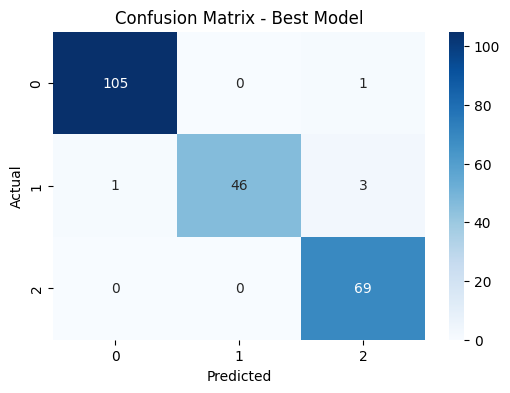

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = rf_model
y_pred_best = y_pred_rf 

conf_matrix = confusion_matrix(y_val, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()


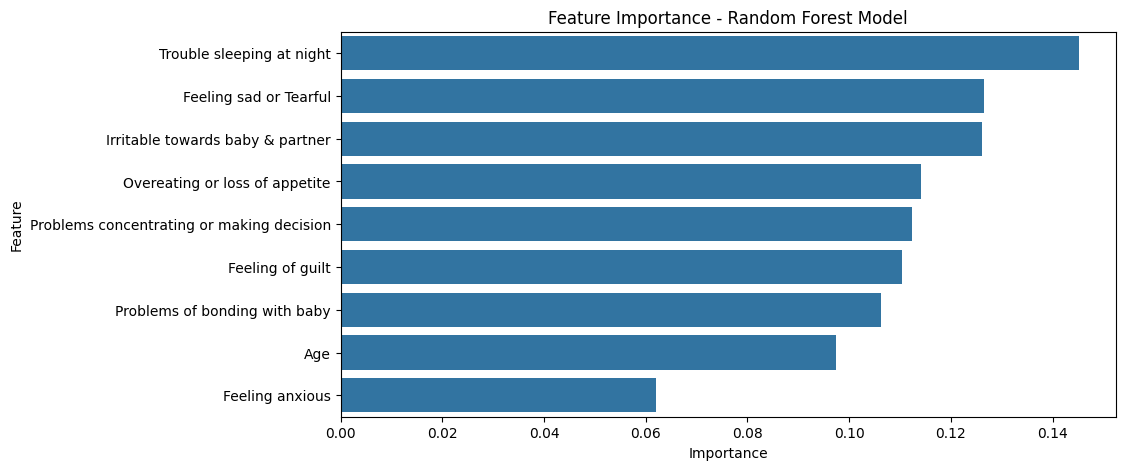

In [35]:

feature_importances = pd.DataFrame({
    "Feature": df.drop(columns=["Suicide attempt"]).columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance - Random Forest Model")
plt.show()


In [36]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    "Logistic Regression": (lr_model, y_pred_lr),
    "Random Forest": (rf_model, y_pred_rf),
    "XGBoost": (xgb_model, y_pred_xgb)
}

results = []
for model_name, (model, y_pred) in models.items():
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    results.append([model_name, acc, precision, recall, f1])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n Model Performance Comparison:\n", df_results)



✅ Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.582222   0.579825  0.582222  0.574464
1        Random Forest  0.977778   0.978752  0.977778  0.977658
2              XGBoost  0.982222   0.982778  0.982222  0.982158


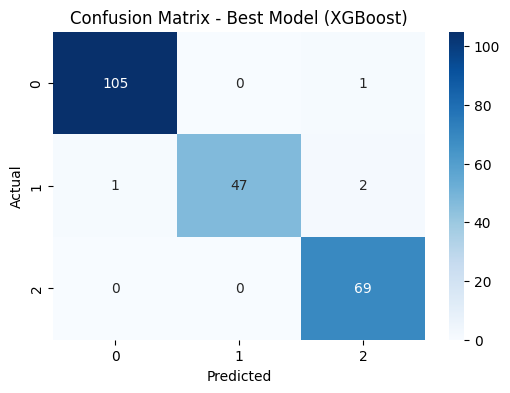

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

best_model_name = df_results.loc[df_results['Accuracy'].idxmax(), 'Model']
best_model, y_pred_best = models[best_model_name]

conf_matrix = confusion_matrix(y_val, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Best Model ({best_model_name})")
plt.show()


In [39]:

if best_model_name == "Random Forest":
    feature_importances = pd.DataFrame({
        "Feature": df.drop(columns=["Suicide attempt"]).columns,
        "Importance": rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x="Importance", y="Feature", data=feature_importances)
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()


In [2]:
pip install xgboost

  Using cached xgboost-2.1.4-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.1 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

file_path = "/Users/dawnenakey/postpartum-depression-analysis/cleaned_postpartum_data.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["Suicide attempt"])
y = df["Suicide attempt"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)
y_pred_probs_xgb = xgb_model.predict_proba(X_val)[:, 1]  # Get probability scores


In [6]:
print("Unique values in y_val:", y_val.unique())


Unique values in y_val: [2 0 1]


In [8]:

y_val_binary = (y_val > 0).astype(int)


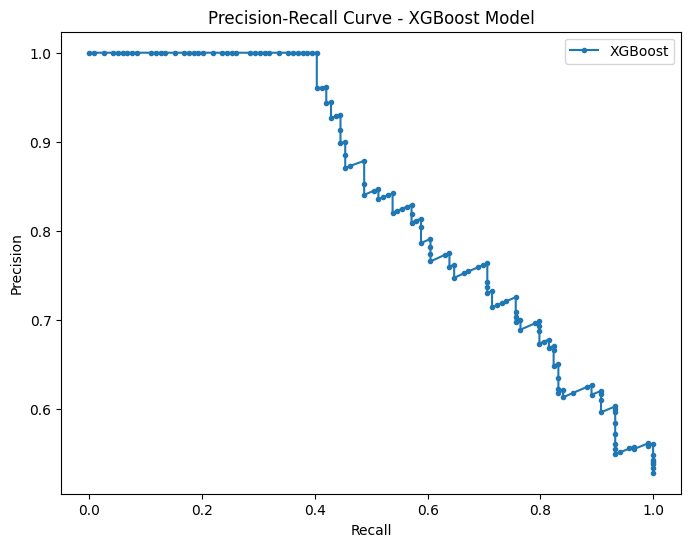

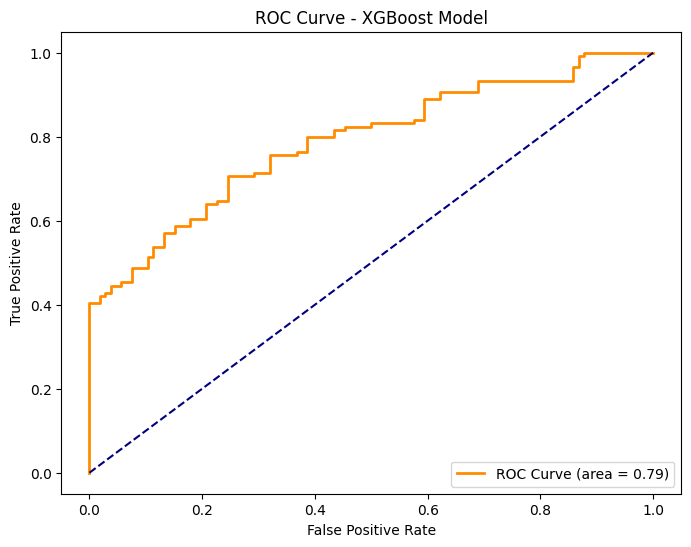

In [9]:

precision, recall, _ = precision_recall_curve(y_val_binary, y_pred_probs_xgb)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost Model")
plt.legend()
plt.show()

fpr, tpr, _ = roc_curve(y_val_binary, y_pred_probs_xgb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Model")
plt.legend(loc="lower right")
plt.show()


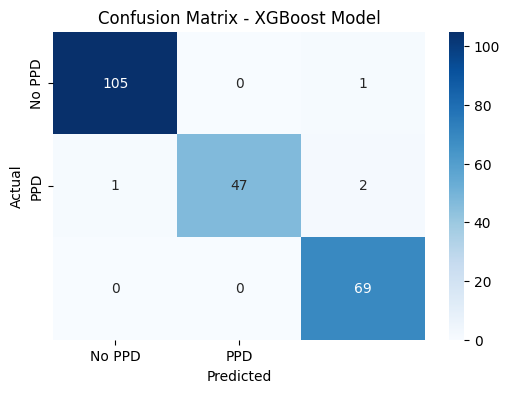

ValueError: multiclass format is not supported

In [10]:
# ------- Visualization 1: Confusion Matrix -------
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_val, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No PPD", "PPD"], yticklabels=["No PPD", "PPD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost Model")
plt.show()

# ------- Visualization 2: Precision-Recall Curve -------
precision, recall, _ = precision_recall_curve(y_val, y_pred_probs_xgb)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost Model")
plt.legend()
plt.show()

# ------- Visualization 3: ROC Curve & AUC Score -------
fpr, tpr, _ = roc_curve(y_val, y_pred_probs_xgb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Model")
plt.legend(loc="lower right")
plt.show()


In [13]:
import pandas as pd

df_postpartum = pd.read_csv("/Users/dawnenakey/postpartum-depression-analysis/cleaned_postpartum_data.csv")
df_maternal = pd.read_csv("/Users/dawnenakey/Downloads/Dataset_maternal_mental_health_infant_sleep.csv", encoding="ISO-8859-1")

race_keywords = ["race", "ethnicity", "ethnic", "racial", "background"]
race_columns_postpartum = [col for col in df_postpartum.columns if any(keyword in col.lower() for keyword in race_keywords)]
race_columns_maternal = [col for col in df_maternal.columns if any(keyword in col.lower() for keyword in race_keywords)]

print("Race/Ethnicity-related columns in Postpartum Dataset:", race_columns_postpartum)
print("Race/Ethnicity-related columns in Maternal Mental Health Dataset:", race_columns_maternal)
# this proves that there is no race/ethnicity related data in both 

/var/folders/5z/lvxb55rs025cbt7mw995_1gm0000gp/T/ipykernel_2768/1337255831.py:5: DtypeWarning: Columns (6,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_maternal = pd.read_csv("/Users/dawnenakey/Downloads/Dataset_maternal_mental_health_infant_sleep.csv", encoding="ISO-8859-1")


Race/Ethnicity-related columns in Postpartum Dataset: []
Race/Ethnicity-related columns in Maternal Mental Health Dataset: []


In [14]:
print(df_postpartum.columns)
print(df_maternal.columns)


Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')
Index(['Participant_number', 'Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Age', 'Marital_status',
       'Marital_status_Autre', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HA